# Import packages

In [1]:
%load_ext autoreload
%autoreload 2

import os, sys, sys
from pathlib import Path
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break

from data_wrangling import specific_utils, process_monkey_information, general_utils
from pattern_discovery import pattern_by_trials, pattern_by_trials, cluster_analysis, organize_patterns_and_features
from visualization.matplotlib_tools import plot_behaviors_utils
from neural_data_analysis.neural_analysis_tools.get_neural_data import neural_data_processing
from neural_data_analysis.neural_analysis_tools.visualize_neural_data import plot_neural_data, plot_modeling_result
from neural_data_analysis.neural_analysis_tools.model_neural_data import transform_vars, neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from neural_data_analysis.topic_based_neural_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from neural_data_analysis.topic_based_neural_analysis.planning_and_neural import planning_and_neural_class, pn_utils, pn_helper_class
from neural_data_analysis.neural_analysis_tools.cca_methods import cca_class
from neural_data_analysis.neural_analysis_tools.cca_methods import cca_class, cca_utils, cca_cv_utils
from neural_data_analysis.neural_analysis_tools.cca_methods.cca_plotting import cca_plotting, cca_plot_lag_vs_no_lag, cca_plot_cv
from machine_learning.ml_methods import regression_utils, ml_methods_utils, regz_regression_utils, ml_methods_class, classification_utils, ml_plotting_utils
from null_behaviors import find_best_arc, curvature_utils, curv_of_traj_utils, opt_arc_utils
from neural_data_analysis.neural_analysis_tools.cca_methods.cca_cv_utils_stage2 import cca_cv_utils2, cca_cv_compare_data
from neural_data_analysis.topic_based_neural_analysis.planning_and_neural import pn_feature_selection

import sys
import math
import gc
import subprocess
from pathlib import Path
from importlib import reload

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from scipy import linalg, interpolate
from scipy.signal import fftconvolve
from scipy.io import loadmat
from scipy import sparse
import torch
from numpy import pi

# Machine Learning imports
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.multivariate.cancorr import CanCorr

# Neuroscience specific imports
import neo
import rcca

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
print("done")

%load_ext autoreload
%autoreload 2

Set up logging configuration.
done
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Retrieve data

In [2]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328"

In [3]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0402"

In [4]:
reload(opt_arc_utils)

<module 'null_behaviors.opt_arc_utils' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/null_behaviors/opt_arc_utils.py'>

In [5]:
reduce_y_var_lags = True
planning_data_by_point_exists_ok = True
y_data_exists_ok = True

pn = planning_and_neural_class.PlanningAndNeural(raw_data_folder_path=raw_data_folder_path)
pn.prep_data_to_analyze_planning(planning_data_by_point_exists_ok=planning_data_by_point_exists_ok)
pn.planning_data_by_point, cols_to_drop = general_utils.drop_columns_with_many_nans(
    pn.planning_data_by_point)
pn.get_x_and_y_data_for_modeling(exists_ok=y_data_exists_ok, reduce_y_var_lags=reduce_y_var_lags)

Retrieved monkey_information


The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Schro/data_0402/ff_dataframe.h5
Made new binned_spikes_df and saved to all_monkey_data/processed_neural_data/monkey_Schro/data_0402/binned_spikes_df_0p05.csv
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Removed 0 rows out of 127 rows where cur_ff was not visible bbas or nxt_ff was not visible both bbas and bsans
shared_stops_near_ff_df has 127 rows
Retrieving shared_stops_near_ff_df succeeded
Failed to retrieve heading_info_df because Failed to retrieve diff_in_curv_df: cur_vis_0_1_window_-25cm_0cm is not in the folder: all_monkey_data/planning/monkey_Schro/data_0402/diff_in_curv_df/opt_arc_stop_closest/test; will make new heading_info_df
Stored new 

In [6]:
stop!

SyntaxError: invalid syntax (3319058519.py, line 1)

# CV: one dataset

In [7]:
from neural_data_analysis.neural_analysis_tools.cca_methods.cca_cv_utils_stage2 import cca_cv_utils2, cca_cv_compare_data, pinpoint_features

X1 = pn.x_var_reduced[[col for col in pn.x_var_reduced.columns if col.startswith('cluster_')]].drop(columns=['bin', 'segment'], errors='ignore').copy()
X2 = pn_feature_selection.select_features(pn.y_var).copy()

cv_summary = cca_cv_utils2.conduct_cca_cv(X1_unscaled=X1, X2_unscaled=X2, trial_ids=pn.y_var['segment'].values)
cca_cv_utils2.plot_cv_cca_overlay(cv_summary, show_train=True)


Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
[CCA CV] Test canonical correlations (mean±sd) for first 10 comps:
  1:0.472±0.094  2:0.312±0.021  3:0.249±0.067  4:0.205±0.040  5:0.263±0.071  6:0.069±0.059  7:0.104±0.037  8:0.087±0.032  9:0.066±0.059  10:0.025±0.071


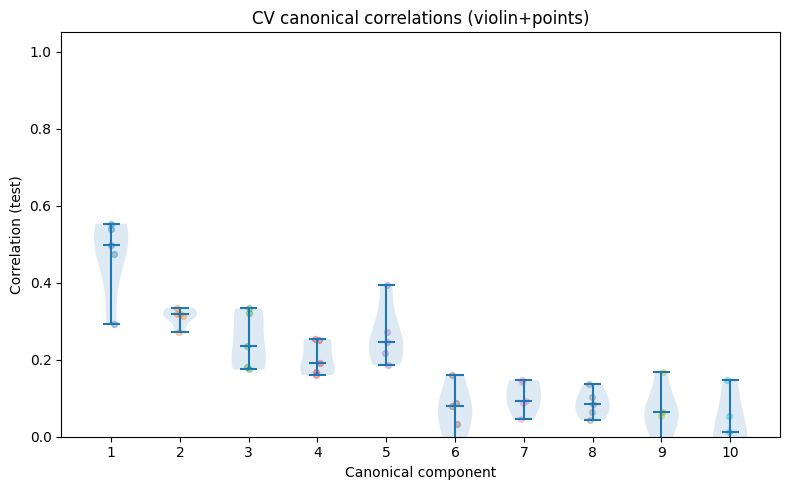

In [8]:
cca_cv_utils2.plot_cv_cca_violin(cv_summary)

In [9]:
cca_cv_utils2.plot_cv_cca_lines(cv_summary)

# Selected features vs rest

Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
[CCA CV] Test canonical correlations (mean±sd) for first 10 comps:
  1:0.472±0.094  2:0.312±0.021  3:0.249±0.067  4:0.205±0.040  5:0.263±0.071  6:0.069±0.059  7:0.104±0.037  8:0.087±0.032  9:0.066±0.059  10:0.025±0.071
Training CCA, kernel = None, regularization = 0.0100, 2 components
Training CCA, kernel = None, regularization = 0.0100, 2 components
Training CCA, kernel = None, regularization = 0.0100, 2 components
Training CCA, kernel = None, regularization = 0.0100, 2 components
Training CCA, kernel = None, regularization = 0.0100, 2 components
[CCA CV] Test canonical correlations (mean±sd) for first 2 comps:
  1:0.277±0.092  2:0.047±0.063


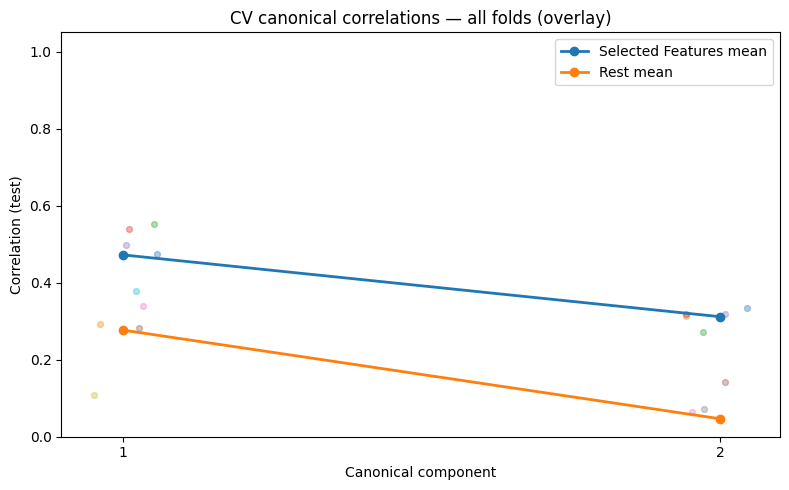

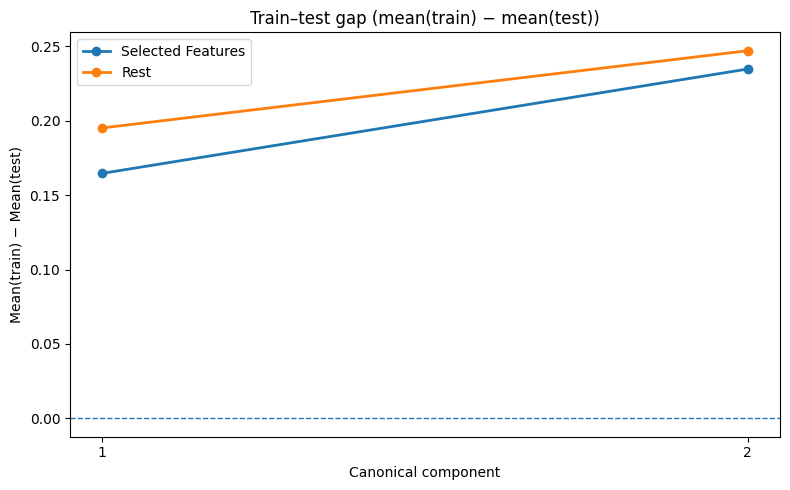

In [10]:
X1 = pn.x_var_reduced[[col for col in pn.x_var_reduced.columns if col.startswith('cluster_')]].drop(columns=['bin', 'segment'], errors='ignore').copy()
X2 = pn_feature_selection.select_features(pn.y_var).copy()
X2_rest = pn.y_var[[col for col in pn.y_var.columns if col not in X2.columns]].copy()

cv_summary = cca_cv_utils2.conduct_cca_cv(X1_unscaled=X1, X2_unscaled=X2, trial_ids=pn.y_var['segment'].values)
cv_summary2 = cca_cv_utils2.conduct_cca_cv(X1_unscaled=X1, X2_unscaled=X2_rest, trial_ids=pn.y_var['segment'].values)

label1 = "Selected Features"
label2 = "Rest"
cca_cv_compare_data.plot_cv_cca_compare_all(cv_summary, cv_summary2, labels=(label1, label2))
# # Or call individual plots if you prefer:
# cca_cv_compare_data.plot_cv_means_sd(cv_summary, cv_summary2, labels=(label1, label2))
# cca_cv_compare_data.plot_cv_all_folds_overlay(cv_summary, cv_summary2, labels=(label1, label2))
# cca_cv_compare_data.plot_cv_mean_difference(cv_summary, cv_summary2, labels=(label1, label2))
# cca_cv_compare_data.plot_cv_train_test_gap(cv_summary, cv_summary2, labels=(label1, label2))


# Eye features vs rest


In [11]:
# Define keywords once
eye_keywords = ("eye", "gaze", "LD", "RD")
eye_cols = [col for col in pn.y_var.columns if any(k in col for k in eye_keywords)]


X1 = pn.x_var_reduced[[col for col in pn.x_var_reduced.columns if col.startswith('cluster_')]].drop(columns=['bin', 'segment'], errors='ignore').copy()
X2 = pn.y_var[eye_cols].copy()

cca_no_lag = cca_class.CCAclass(X1=X1, 
                                X2=X2, 
                                lagging_included=False)
cca_no_lag.conduct_cca()

cca_rest = cca_class.CCAclass(X1=X1, 

SyntaxError: incomplete input (808106848.py, line 14)

Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
[CCA CV] Test canonical correlations (mean±sd) for first 10 comps:
  1:0.335±0.050  2:0.179±0.019  3:0.041±0.029  4:0.064±0.022  5:0.009±0.019  6:0.017±0.008  7:0.053±0.037  8:0.026±0.024  9:0.035±0.015  10:-0.010±0.013
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
[CCA CV] Test canonical correlations (mean±sd) for first 10 comps:
  1:0.569±0.174  2:0.336±0.084  3

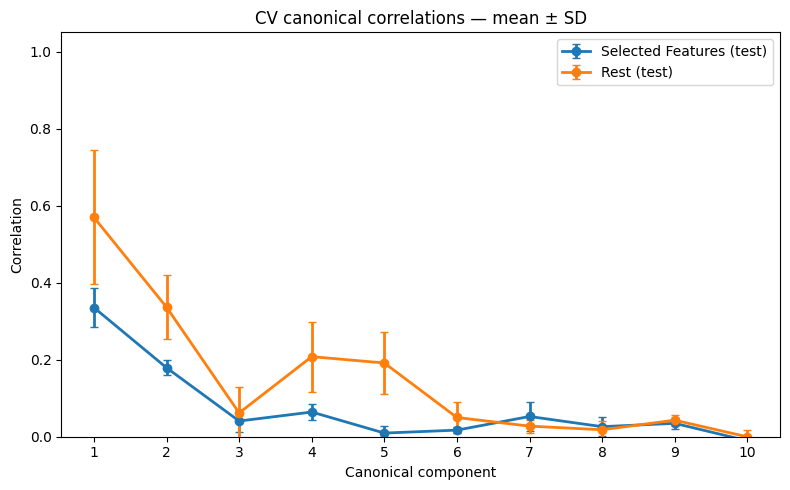

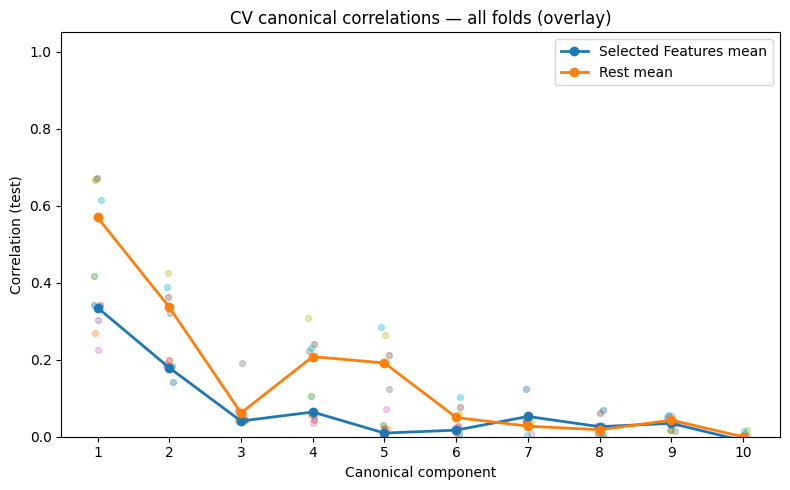

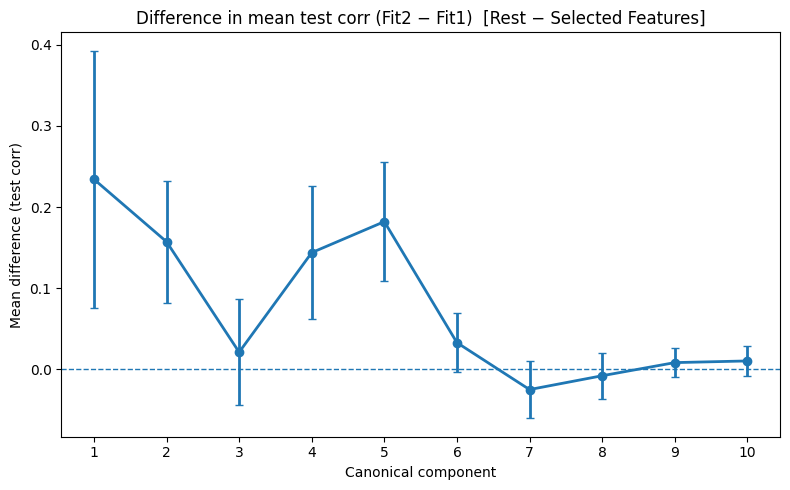

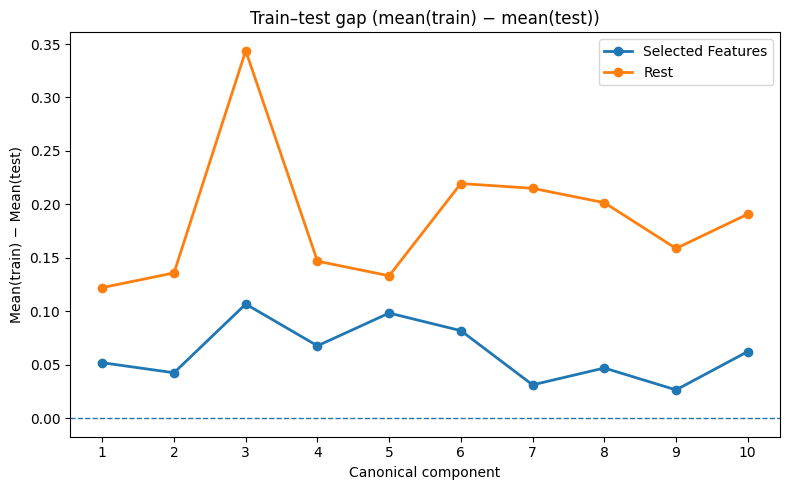

In [ ]:
eye_keywords = ("eye", "gaze", "LD", "RD")
eye_cols = [col for col in pn.y_var.columns if any(k in col for k in eye_keywords)]

X1 = pn.x_var_reduced[[col for col in pn.x_var_reduced.columns if col.startswith('cluster_')]].drop(columns=['bin', 'segment'], errors='ignore').copy()
X2 = pn.y_var[eye_cols].copy()
X2_rest = pn.y_var[[col for col in pn.y_var.columns if col not in X2.columns]].copy()

cv_summary = cca_cv_utils2.conduct_cca_cv(X1_unscaled=X1, X2_unscaled=X2, trial_ids=pn.y_var['segment'].values)
cv_summary2 = cca_cv_utils2.conduct_cca_cv(X1_unscaled=X1, X2_unscaled=X2_rest, trial_ids=pn.y_var['segment'].values)

label1 = "Selected Features"
label2 = "Rest"
cca_cv_compare_data.plot_cv_cca_compare_all(cv_summary, cv_summary2, labels=(label1, label2))

# Selected features vs Eyes

Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
[CCA CV] Test canonical correlations (mean±sd) for first 10 comps:
  1:0.146±0.037  2:0.134±0.045  3:0.114±0.042  4:0.103±0.040  5:0.044±0.113  6:0.014±0.032  7:0.040±0.021  8:0.035±0.015  9:0.019±0.043  10:0.032±0.012
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
[CCA CV] Test canonical correlations (mean±sd) for first 10 comps:
  1:0.333±0.043  2:0.229±0.028  3:

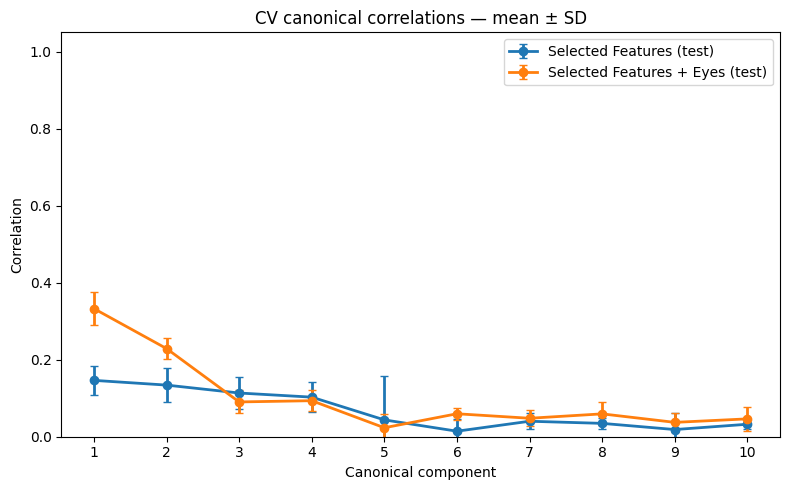

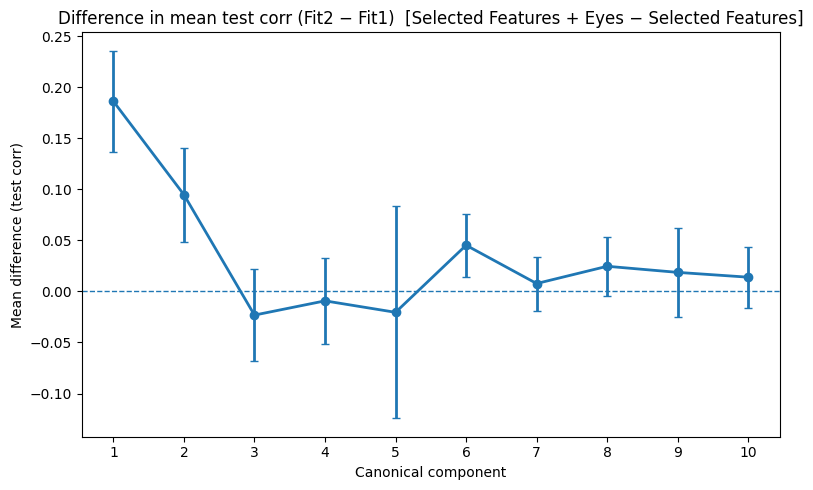

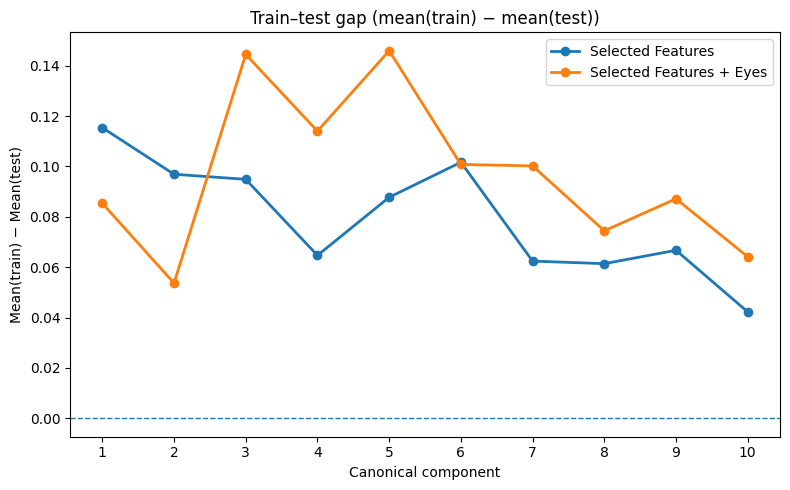

In [ ]:
X1 = pn.x_var_reduced[[col for col in pn.x_var_reduced.columns if col.startswith('cluster_')]].drop(columns=['bin', 'segment'], errors='ignore').copy()

eye_keywords = ("eye", "gaze", "LD", "RD")
eye_cols = [col for col in pn.y_var.columns if any(k in col for k in eye_keywords)]
X2 = pn_feature_selection.select_features(pn.y_var).copy()

X2_rest = pd.concat([X2, pn.y_var[eye_cols]], axis=1)

cv_summary = cca_cv_utils2.conduct_cca_cv(X1_unscaled=X1, X2_unscaled=X2, trial_ids=pn.y_var['segment'].values)
cv_summary2 = cca_cv_utils2.conduct_cca_cv(X1_unscaled=X1, X2_unscaled=X2_rest, trial_ids=pn.y_var['segment'].values)


label1 = "Selected Features"
label2 = "Selected Features + Eyes"
cca_cv_compare_data.plot_cv_cca_compare_all(cv_summary, cv_summary2, labels=(label1, label2))
# # Or call individual plots if you prefer:
# cca_cv_compare_data.plot_cv_means_sd(cv_summary, cv_summary2, labels=(label1, label2))
# cca_cv_compare_data.plot_cv_all_folds_overlay(cv_summary, cv_summary2, labels=(label1, label2))
# cca_cv_compare_data.plot_cv_mean_difference(cv_summary, cv_summary2, labels=(label1, label2))
# cca_cv_compare_data.plot_cv_train_test_gap(cv_summary, cv_summary2, labels=(label1, label2))


# Selected features vs All

Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
[CCA CV] Test canonical correlations (mean±sd) for first 10 comps:
  1:0.146±0.037  2:0.134±0.045  3:0.114±0.042  4:0.103±0.040  5:0.044±0.113  6:0.014±0.032  7:0.040±0.021  8:0.035±0.015  9:0.019±0.043  10:0.032±0.012
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
[CCA CV] Test canonical correlations (mean±sd) for first 10 comps:
  1:0.567±0.172  2:0.355±0.059  3:

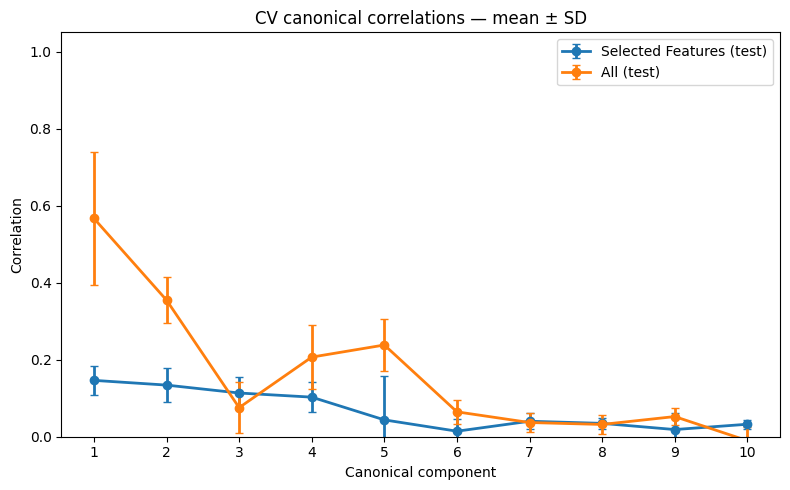

In [ ]:
X1 = pn.x_var_reduced[[col for col in pn.x_var_reduced.columns if col.startswith('cluster_')]].drop(columns=['bin', 'segment'], errors='ignore').copy()
X2 = pn_feature_selection.select_features(pn.y_var).copy()

X2_rest = pn.y_var.copy()

cv_summary = cca_cv_utils2.conduct_cca_cv(X1_unscaled=X1, X2_unscaled=X2, trial_ids=pn.y_var['segment'].values)
cv_summary2 = cca_cv_utils2.conduct_cca_cv(X1_unscaled=X1, X2_unscaled=X2_rest, trial_ids=pn.y_var['segment'].values)


label1 = "Selected Features"
label2 = "All"
cca_cv_compare_data.plot_cv_cca_compare_all(cv_summary, cv_summary2, labels=(label1, label2))
# # Or call individual plots if you prefer:
# cca_cv_compare_data.plot_cv_means_sd(cv_summary, cv_summary2, labels=(label1, label2))
# cca_cv_compare_data.plot_cv_all_folds_overlay(cv_summary, cv_summary2, labels=(label1, label2))
# cca_cv_compare_data.plot_cv_mean_difference(cv_summary, cv_summary2, labels=(label1, label2))
# cca_cv_compare_data.plot_cv_train_test_gap(cv_summary, cv_summary2, labels=(label1, label2))


# Selected features + Eyes vs All Reduced

Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
[CCA CV] Test canonical correlations (mean±sd) for first 10 comps:
  1:0.337±0.044  2:0.250±0.018  3:0.090±0.024  4:0.087±0.036  5:0.023±0.027  6:0.040±0.025  7:0.039±0.015  8:0.046±0.019  9:0.055±0.039  10:0.056±0.034
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
[CCA CV] Test canonical correlations (mean±sd) for first 10 comps:
  1:0.515±0.148  2:0.225±0.089  3:

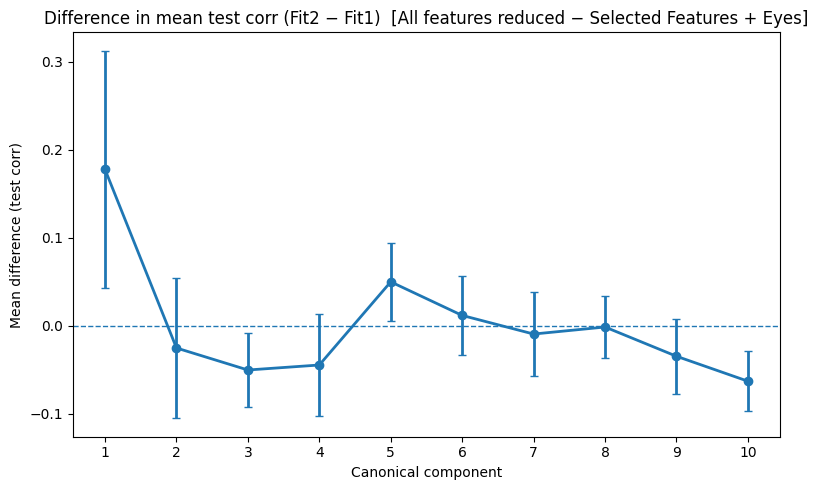

In [ ]:
X1 = pn.x_var_reduced[[col for col in pn.x_var_reduced.columns if col.startswith('cluster_')]].drop(columns=['bin', 'segment'], errors='ignore').copy()

eye_keywords = ("eye", "gaze", "LD", "RD")
eye_cols = [col for col in pn.y_var.columns if any(k in col for k in eye_keywords)]
X2 = pn_feature_selection.select_features(pn.y_var).copy()
X2 = pd.concat([X2, pn.y_var[eye_cols]], axis=1)

X2_rest = pn.y_var_reduced.copy()

cv_summary = cca_cv_utils2.conduct_cca_cv(X1_unscaled=X1, X2_unscaled=X2, trial_ids=pn.y_var['segment'].values)
cv_summary2 = cca_cv_utils2.conduct_cca_cv(X1_unscaled=X1, X2_unscaled=X2_rest, trial_ids=pn.y_var['segment'].values)


label1 = "Selected Features + Eyes"
label2 = "All features reduced"
cca_cv_compare_data.plot_cv_cca_compare_all(cv_summary, cv_summary2, labels=(label1, label2))
# # Or call individual plots if you prefer:
# cca_cv_compare_data.plot_cv_means_sd(cv_summary, cv_summary2, labels=(label1, label2))
# cca_cv_compare_data.plot_cv_all_folds_overlay(cv_summary, cv_summary2, labels=(label1, label2))
# cca_cv_compare_data.plot_cv_mean_difference(cv_summary, cv_summary2, labels=(label1, label2))
# cca_cv_compare_data.plot_cv_train_test_gap(cv_summary, cv_summary2, labels=(label1, label2))


# All vs Reduced

Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
[CCA CV] Test canonical correlations (mean±sd) for first 10 comps:
  1:0.567±0.172  2:0.355±0.059  3:0.076±0.066  4:0.207±0.083  5:0.238±0.068  6:0.065±0.031  7:0.037±0.026  8:0.032±0.026  9:0.052±0.022  10:-0.010±0.036
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
[CCA CV] Test canonical correlations (mean±sd) for first 10 comps:
  1:0.515±0.148  2:0.225±0.089  3

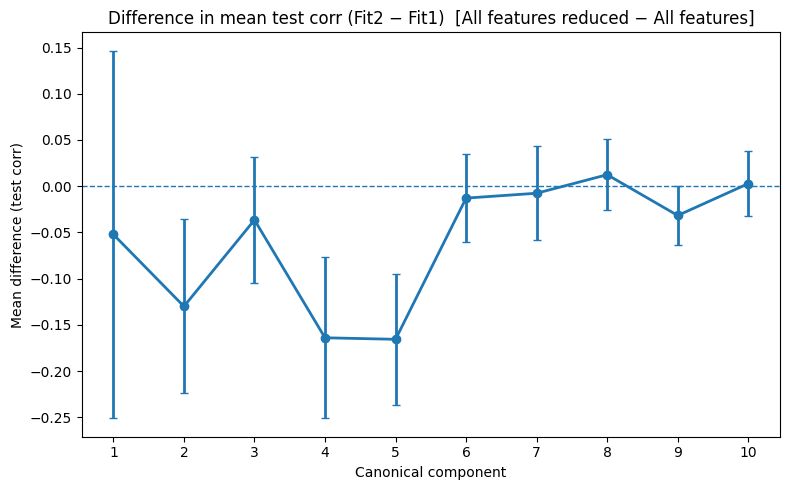

In [ ]:
X1 = pn.x_var_reduced[[col for col in pn.x_var_reduced.columns if col.startswith('cluster_')]].drop(columns=['bin', 'segment'], errors='ignore').copy()
X2 = pn.y_var.copy()
X2_rest = pn.y_var_reduced.copy()

cv_summary = cca_cv_utils2.conduct_cca_cv(X1_unscaled=X1, X2_unscaled=X2, trial_ids=pn.y_var['segment'].values)
cv_summary2 = cca_cv_utils2.conduct_cca_cv(X1_unscaled=X1, X2_unscaled=X2_rest, trial_ids=pn.y_var['segment'].values)


label1 = "All features"
label2 = "All features reduced"
cca_cv_compare_data.plot_cv_cca_compare_all(cv_summary, cv_summary2, labels=(label1, label2))
# # Or call individual plots if you prefer:
# cca_cv_compare_data.plot_cv_means_sd(cv_summary, cv_summary2, labels=(label1, label2))
# cca_cv_compare_data.plot_cv_all_folds_overlay(cv_summary, cv_summary2, labels=(label1, label2))
# cca_cv_compare_data.plot_cv_mean_difference(cv_summary, cv_summary2, labels=(label1, label2))
# cca_cv_compare_data.plot_cv_train_test_gap(cv_summary, cv_summary2, labels=(label1, label2))


Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
[CCA CV] Test canonical correlations (mean±sd) for first 10 comps:
  1:0.567±0.172  2:0.355±0.059  3:0.076±0.066  4:0.207±0.083  5:0.238±0.068  6:0.065±0.031  7:0.037±0.026  8:0.032±0.026  9:0.052±0.022  10:-0.010±0.036
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
[CCA CV] Test canonical correlations (mean±sd) for first 10 comps:
  1:0.515±0.148  2:0.225±0.089  3

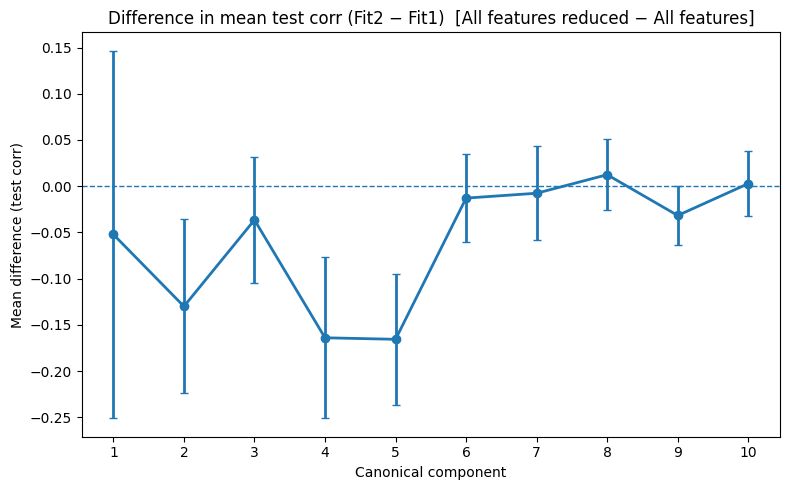

In [ ]:
X1 = pn.x_var_reduced[[col for col in pn.x_var_reduced.columns if col.startswith('cluster_')]].drop(columns=['bin', 'segment'], errors='ignore').copy()
X2 = pn.y_var.copy()
X2_rest = pn.y_var_reduced.copy()

cv_summary = cca_cv_utils2.conduct_cca_cv(X1_unscaled=X1, X2_unscaled=X2, trial_ids=pn.y_var['segment'].values)
cv_summary2 = cca_cv_utils2.conduct_cca_cv(X1_unscaled=X1, X2_unscaled=X2_rest, trial_ids=pn.y_var['segment'].values)


label1 = "All features"
label2 = "All features reduced"
cca_cv_compare_data.plot_cv_cca_compare_all(cv_summary, cv_summary2, labels=(label1, label2))
# # Or call individual plots if you prefer:
# cca_cv_compare_data.plot_cv_means_sd(cv_summary, cv_summary2, labels=(label1, label2))
# cca_cv_compare_data.plot_cv_all_folds_overlay(cv_summary, cv_summary2, labels=(label1, label2))
# cca_cv_compare_data.plot_cv_mean_difference(cv_summary, cv_summary2, labels=(label1, label2))
# cca_cv_compare_data.plot_cv_train_test_gap(cv_summary, cv_summary2, labels=(label1, label2))


# Pinpoint features

In [ ]:
from neural_data_analysis.neural_analysis_tools.cca_methods.cca_cv_utils_stage2 import cca_cv_utils2, cca_cv_compare_data, pinpoint_features

## CV permutation importance (no retraining per feature)

In [ ]:
# X1 = pn.x_var_reduced[[col for col in pn.x_var_reduced.columns if col.startswith('cluster_')]].drop(columns=['bin', 'segment'], errors='ignore').copy()
# # X2 = pn.y_var.drop(columns=['bin', 'segment'], errors='ignore').copy()
# X2 = pn.y_var.copy()

# scaler = StandardScaler()
# X1_sc, X2_sc = scaler.fit_transform(
#     X1), scaler.fit_transform(X2)

# # all_names is a list of feature names for the all data set
# imp = pinpoint_features.cv_cca_perm_importance(X2_sc, X1_sc, X2.columns,
#                              n_components=10, reg=1e-2, n_splits=5,
#                              groups=pn.y_var['segment'].values, max_components_for_score=3)
# imp.head(20)  # top contributors


In [ ]:
imp_X1, diag_X1, top_abs, top_pct = pinpoint_features.run_perm_importance_X1(
    X2_sc, X1_sc, X2.columns,
    n_components=10, reg=1e-2, n_splits=5,
    Kfirst=3, top_k=20, verbose=True, make_plots=True
)


Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
[SANITY] Mean baseline test correlations: [0.625 0.394 0.221 0.282 0.266 0.182 0.12  0.107 0.104 0.072]

[Baseline means] X1→X2: [0.625 0.394 0.221 0.282 0.266 0.182 0.12  0.107 0.104 0.072]

Top by ABSOLUTE drop (avg of first K comps):


,feature,mean_drop_firstK,drop_comp1,drop_comp2,drop_comp3
0,cum_distance_target_cluster_last_seen,0.46578,0.96096,0.33659,0.09979
1,cum_distance,0.46259,0.94706,0.32024,0.12047
2,cum_distance_when_target_last_seen,0.45355,0.92709,0.30198,0.13158
3,dir_from_cur_ff_to_stop,0.33155,0.55345,0.32045,0.12075
4,angle_from_cur_ff_to_stop,0.31070,0.48654,0.33091,0.11464
5,angle_from_m_before_stop_to_cur_ff,0.27832,0.45442,0.30696,0.07358
6,monkey_y_smr,0.23318,0.38487,0.16824,0.14643
7,monkey_x_smr,0.21372,0.27058,0.28640,0.08417
8,monkey_x,0.20738,0.25451,0.30229,0.06534
9,monkey_y,0.20321,0.30302,0.17845,0.12814



Top by PERCENT drop (avg of first K comps):


,feature,pct_drop_firstK,pct_drop_comp1,pct_drop_comp2,pct_drop_comp3
1,cum_distance,0.95805,1.51593,0.81233,0.54588
2,cum_distance_when_target_last_seen,0.94873,1.48396,0.76601,0.59622
0,cum_distance_target_cluster_last_seen,0.94805,1.53818,0.85380,0.45218
3,dir_from_cur_ff_to_stop,0.74862,0.88589,0.81284,0.54713
4,angle_from_cur_ff_to_stop,0.71254,0.77880,0.83938,0.51946
5,angle_from_m_before_stop_to_cur_ff,0.61315,0.72738,0.77865,0.33342
6,monkey_y_smr,0.56877,0.61605,0.42675,0.66351
7,monkey_x_smr,0.51366,0.43311,0.72648,0.38139
9,monkey_y,0.50612,0.48504,0.45266,0.58065
8,monkey_x,0.49008,0.40738,0.76678,0.29607


## CV leave-one-out Δρ (re-train per feature)

In [ ]:
# Leave-one-out Δρ for all features (re-fit per feature)
imp_loo = pinpoint_features.cv_cca_leave1out_delta(
    X2_sc, X1_sc, X2.columns,
    n_components=10, reg=1e-2,
    n_splits=5, random_state=0, groups=pn.y_var['segment'].values,
    max_components_for_score=3   # average drop over first K comps
)
print(imp_loo.head(20))          # top contributors


KeyboardInterrupt: 

## structure coefficients

Note: The sign is arbitrary (CCA axes can flip), so focus on magnitudes.

In [ ]:
# Held-out structure coefficients: corr(feature_j, X1 canonical comp_k) on test folds
sc_df = pinpoint_features.cv_structure_coefficients(
    X2_sc, X1_sc, X2.columns,
    n_components=10, reg=1e-2,
    n_splits=5, random_state=0, groups=pn.y_var['segment'].values,
)
# Features most aligned with the first canonical mode:
print(sc_df.loc[:, ["feature", "SC_comp1"]].reindex(
      sc_df.index,).head(20))


Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
Training CCA, kernel = None, regularization = 0.0100, 10 components
                                  feature  SC_comp1
0                            cum_distance  -0.75359
1      cum_distance_when_target_last_seen  -0.75359
2   cum_distance_target_cluster_last_seen  -0.75359
3                 last_target_caught_time  -0.74618
4                          seg_start_time  -0.74612
5                               stop_time  -0.74612
6              current_target_caught_time  -0.74612
7                            seg_end_time  -0.74612
8                                     bin  -0.74609
9                                    time  -0.74609
10                  time_target_last_seen  -0.74607
11                           target_

In [ ]:
# sc_df is your structure-coefficient table with SC_comp1..SC_compK
top = sc_df.assign(abs1=np.abs(sc_df["SC_comp1"])).nlargest(25, "abs1")
H = top[[c for c in sc_df.columns if c.startswith("SC_comp")]].to_numpy()
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
plt.imshow(np.abs(H[:, :5]), aspect="auto")
plt.yticks(range(len(top)), top["feature"])
plt.xticks(range(5), [f"Comp {i+1}" for i in range(5)])
plt.colorbar(label="|SC|")
plt.title("Held-out structure coefficients (top by comp1)")
plt.tight_layout()
plt.show()


# CCA (original class)

https://medium.com/@pozdrawiamzuzanna/canonical-correlation-analysis-simple-explanation-and-python-example-a5b8e97648d2

## Fit

In [ ]:
X2.shape

(8343, 157)

Training CCA, kernel = None, regularization = 0.0100, 10 components
Canonical Correlation Per Component Pair: [0.68984 0.47523 0.37209 0.3579  0.34956 0.27026 0.23749 0.21361 0.2019
 0.1874 ]
% Shared Variance: [0.47588 0.22585 0.13845 0.12809 0.12219 0.07304 0.0564  0.04563 0.04077
 0.03512]


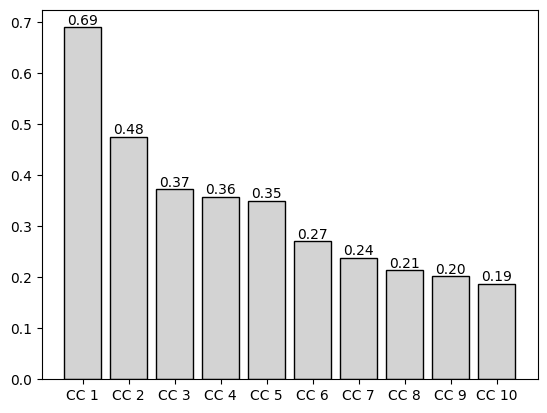

Training CCA, kernel = None, regularization = 0.0100, 10 components
Canonical Correlation Per Component Pair: [0.81752 0.5647  0.53223 0.49538 0.45782 0.45148 0.42979 0.41153 0.40446
 0.39186]
% Shared Variance: [0.66834 0.31889 0.28327 0.2454  0.2096  0.20383 0.18472 0.16935 0.16359
 0.15356]


pn.x_var_lags.shape: (8343, 255)
pn.y_var_lags_reduced.shape: (8343, 263)


In [ ]:
# If error occurs, try reducing y_var again, and can also try pn.y_var_reduced.corr()[pn.y_var_reduced.corr() > 0.9]


X1 = pn.x_var_reduced[[col for col in pn.x_var_reduced.columns if col.startswith('cluster_')]].drop(columns=['bin', 'segment'], errors='ignore').copy()
# X2 = pn.y_var_reduced.drop(columns=['bin', 'segment'], errors='ignore').copy()
X2 = pn.y_var.copy()
cca_no_lag = cca_class.CCAclass(X1=X1, 
                                X2=X2, 
                                lagging_included=False)
cca_no_lag.conduct_cca()

X1_lags = pn.x_var_lags_reduced[[col for col in pn.x_var_lags_reduced.columns if col.startswith('cluster_')]].drop(columns=['bin', 'segment'], errors='ignore').copy()
X2_lags = pn.y_var_lags_reduced.copy()
cca_lags = cca_class.CCAclass(X1=X1_lags, 
                              X2=X2_lags, 
                              lagging_included=True)
# for all columns that end with _0, rename them to the column name without the _0
cca_lags.X2.columns = cca_lags.X2.columns.str.replace('_0', '')
cca_lags.conduct_cca()


print(f'pn.x_var_lags.shape: {pn.x_var_lags.shape}')
print(f'pn.y_var_lags_reduced.shape: {pn.y_var_lags_reduced.shape}')

cca_inst = cca_lags

## X2 loadings

In [ ]:
cca_no_lag.plot_X2_loadings()

                               Cancorr results
    Canonical Correlation Wilks' lambda   Num DF      Den DF    F Value Pr > F
------------------------------------------------------------------------------
0                  0.6423        0.0000 63404.0000 1409956.3757  1.2814 0.0000
1                  0.5541        0.0001 62901.0000 1404460.1442  1.2210 0.0000
2                  0.5275        0.0001 62400.0000 1398962.8053  1.1820 0.0000
3                  0.4918        0.0002 61901.0000 1393464.3578  1.1478 0.0000
4                  0.4577        0.0002 61404.0000 1387964.8005  1.1197 0.0000
5                  0.4471        0.0003 60909.0000 1382464.1319  1.0969 0.0000
6                  0.4245        0.0003 60416.0000 1376962.3507  1.0753 0.0000
7                  0.4065        0.0004 59925.0000 1371459.4556  1.0568 0.0000
8                  0.3969        0.0005 59436.0000 1365955.4451  1.0405 0.0000
9                  0.3919        0.0006 58949.0000 1360450.3179  1.0251 0.0000
10   

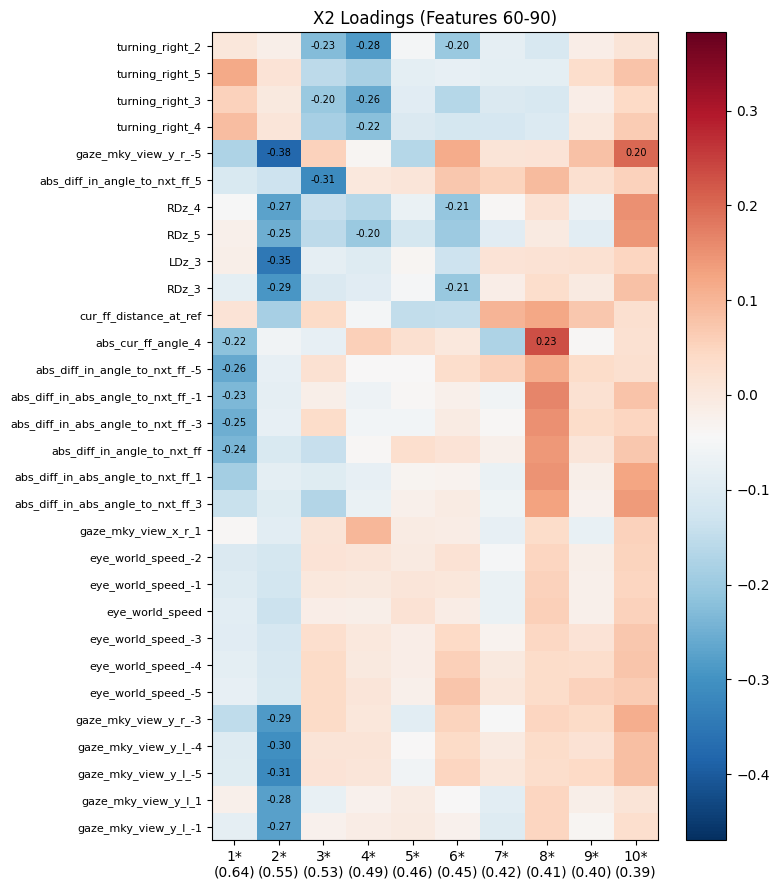

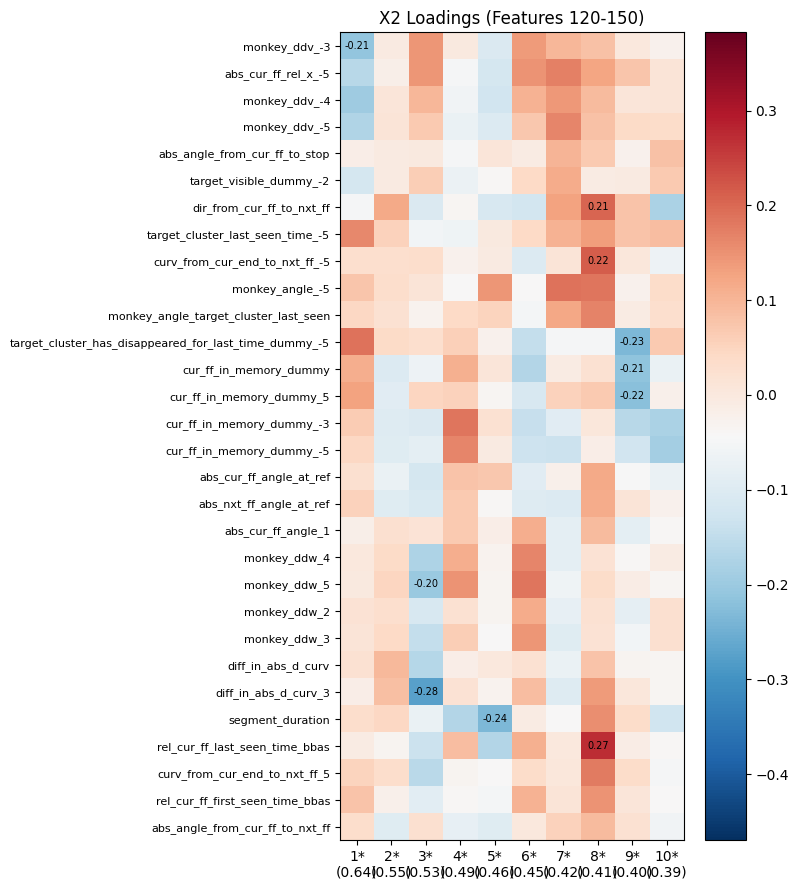

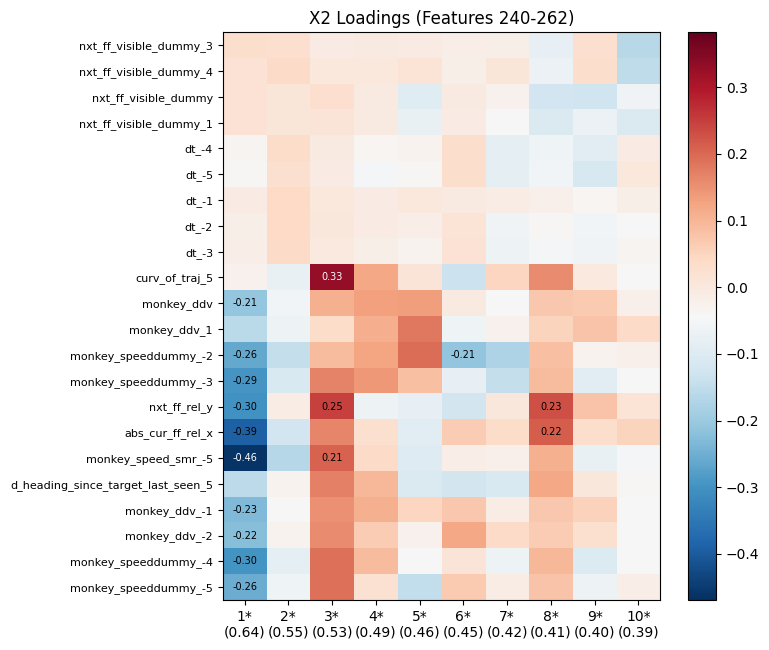

In [ ]:
cca_lags.plot_X2_loadings()

In [ ]:
stop!

SyntaxError: invalid syntax (3319058519.py, line 1)

# Test lags

## compared to baseline model

BASE = “baseline design matrix” (all other predictors, no lags for this feature).

BASE + best1 = baseline + the single best lag.

BASE + all = baseline + the whole lag block.

In [ ]:
# multiff_code/methods/neural_data_analysis/neural_analysis_tools/cca_methods/advanced_cca_tools/test_lags_in_cca.py
from neural_data_analysis.neural_analysis_tools.cca_methods.advanced_cca_tools import test_lags_in_cca, partial_cca_test, partition_x_utils

In [ ]:
features_to_test = ['monkey_speeddummy', 'RDz', 'gaze_mky_vew_y_l', 'gaze_mky_vew_y_r'
                    'abs_diff_in_angle_to_nxt_ff', 'abs_diff_in_abs_angle_to_nxt_ff',
                    'cur_cntr_arc_curv', 'turning_right']

for feature in features_to_test:
    # find lagged columns in X2_lags
    lag_cols = [col for col in X2_lags.columns if feature in col]
    if len(lag_cols) == 0:
        print(f"No lagged columns found for {feature}")
        continue
    # find their indices in X2_lags
    lag_cols_indices = [X2_lags.columns.get_loc(col) for col in lag_cols]


    print('===============================================')
    print(f'Testing {feature}')
    res = test_lags_in_cca.evaluate_lag_block_in_full_model(X2_lags, X1_lags, lag_block_cols=lag_cols_indices, n_splits=5, random_state=1)
    print("Test cancorr means:")
    print("  BASE                :", res.test_mean_BASE)
    print("  BASE + best single  :", res.test_mean_BASE_plus_best1)
    print("  BASE + all lags     :", res.test_mean_BASE_plus_all)
    print("Δ(all - BASE):", res.delta_all_vs_base, "  Δ(all - best1):", res.delta_all_vs_best1)
    print("Best single lag (per fold):", res.best_single_indices)
    print("Partial structure loadings (full model):", res.partial_loadings_full)

Testing monkey_speeddummy
Test cancorr means:
  BASE                : 0.5463603880675852
  BASE + best single  : 0.5468924918154532
  BASE + all lags     : 0.5448827776792102
Δ(all - BASE): -0.001477610388375017   Δ(all - best1): -0.002009714136242957
Best single lag (per fold): [9, 6, 6, 6, 9]
Partial structure loadings (full model): [ 0.30908 -0.20877 -0.49204 -0.26642 -0.08138  0.45172  0.60668  0.46751
  0.57524  0.61075  0.54448]
Testing RDz
Test cancorr means:
  BASE                : 0.5236911198387901
  BASE + best single  : 0.5342125025025753
  BASE + all lags     : 0.54488277767921
Δ(all - BASE): 0.021191657840419875   Δ(all - best1): 0.010670275176634658
Best single lag (per fold): [0, 1, 1, 4, 0]
Partial structure loadings (full model): [ 0.52928  0.55452  0.57523  0.47831  0.50886 -0.15092  0.28919  0.4349 ]
No lagged columns found for gaze_mky_vew_y_l
No lagged columns found for gaze_mky_vew_y_rabs_diff_in_angle_to_nxt_ff
Testing abs_diff_in_abs_angle_to_nxt_ff
Test cancor

In [ ]:

# X_full: (n, p) design matrix with ALL features (including the lagged ones)
# Y:      (n, q) opposite view
# lag_block_cols: list of column indices in X_full for the ONE feature's lags you want to inspect
#
res = test_lags_in_cca.evaluate_lag_block_in_full_model(X2_lags, X1_lags, lag_block_cols=lag_cols_indices, n_splits=5, random_state=1)
print("Test cancorr means:")
print("  BASE                :", res.test_mean_BASE)
print("  BASE + best single  :", res.test_mean_BASE_plus_best1)
print("  BASE + all lags     :", res.test_mean_BASE_plus_all)
print("Δ(all - BASE):", res.delta_all_vs_base, "  Δ(all - best1):", res.delta_all_vs_best1)
print("Best single lag (per fold):", res.best_single_indices)
print("Partial structure loadings (full model):", res.partial_loadings_full)


Test cancorr means:
  BASE                : 0.5463603880675852
  BASE + best single  : 0.5468924918154532
  BASE + all lags     : 0.5448827776792102
Δ(all - BASE): -0.001477610388375017   Δ(all - best1): -0.002009714136242957
Best single lag (per fold): [9, 6, 6, 6, 9]
Partial structure loadings (full model): [ 0.30908 -0.20877 -0.49204 -0.26642 -0.08138  0.45172  0.60668  0.46751
  0.57524  0.61075  0.54448]


## plot lag block loadings

In [ ]:
res = evaluate_lag_block_in_full_model(
    X_full=pn.y_var_lags_reduced,
    Y=pn.x_var_lags_reduced,
    lag_block_cols=lag_cols_indices,
    n_splits=5, random_state=1
)

plot_lag_block_loadings(res.partial_loadings_full,
                        best_single_indices=res.best_single_indices,
                        title="MyFeature lag footprint")

## Partial CCA incremental test

In [ ]:
# e.g., columns like: 'speed_lag0', 'speed_lag1', ..., 'speed_lag10'
out = partition_x_utils.partition_X_base_block(
    X=X2_lags, 
    block_name_regex=r"^monkey_speeddummy_\d+$"
)


In [ ]:
out.keys()

dict_keys(['X_base', 'X_block', 'base_indices', 'block_indices', 'base_mask', 'block_mask', 'block_posmap'])

In [ ]:
res = partial_cca_test.partial_cca_incremental_cv(
    X2_lags, X1_lags, lag_block_cols=lag_cols_indices,
    n_splits=5,
    random_state=1
)

print("Mean TEST partial cancorr:", res.mean_test_partial_cancorr)
print("Fold TEST partial cancorr:", res.fold_test_partial_cancorr)
print("Mean TRAIN partial cancorr:", res.mean_train_partial_cancorr)
print("Notes:", res.notes)


Mean TEST partial cancorr: 0.09017360026372444
Fold TEST partial cancorr: [0.06667890305520417, 0.06303862859097646, 0.12454028149422149, 0.108759454153434, 0.08785073402478612]
Mean TRAIN partial cancorr: 0.2666782638960339
Notes: We residualized Y and the lag block on BASE inside each fold, then ran 1D CCA between residuals. Near-zero mean TEST canonical correlation implies no unique contribution from the lag block beyond BASE.


## replace with bases

(not working yet...might be better to use methods from my design_bases or transform_vars)

In [ ]:
# from neural_data_analysis.neural_analysis_tools.glm_tools.tpg import glm_bases

# # Suppose lag_block_cols = indices of this feature’s lags in X_full
# X_full = X2_lags
# lag_block_cols = lag_cols_indices

# X_block = X_full.iloc[:, lag_block_cols].to_numpy()   # shape (n, L)
# B, centers = glm_bases.raised_cosine_basis(n_basis=4, n_lags=X_block.shape[1])
# X_basis = X_block @ B    # shape (n, 4)

# mask_block = np.zeros(X_full[1], dtype=bool)
# mask_block[np.asarray(lag_block_cols, dtype=int)] = True
    
# # Now build a new X_full with raw lag block replaced
# X_new = np.concatenate([X_full.iloc[:, ~mask_block].to_numpy(), X_basis], axis=1)


# Hyperparam tuning

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
import rcca

def _pairwise_finite_mask(A, B):
    return np.isfinite(A).all(1) & np.isfinite(B).all(1)

def _drop_low_variance(X, tol=1e-12):
    keep = np.nanvar(X, axis=0) > tol
    return X[:, keep], keep

def cv_cca_pyrcca_safe(X1, X2, reg=1e-2, n_components=10, n_splits=5, random_state=0, var_tol=1e-12):
    # 1) Pairwise finite rows only
    mask = _pairwise_finite_mask(X1, X2)
    X1, X2 = X1[mask], X2[mask]

    # 2) Drop near-constant columns globally
    X1, keep1 = _drop_low_variance(X1, tol=var_tol)
    X2, keep2 = _drop_low_variance(X2, tol=var_tol)

    if X1.shape[1] == 0 or X2.shape[1] == 0 or len(X1) < n_splits:
        return float("-inf")

    n_components = int(min(n_components, X1.shape[1], X2.shape[1]))

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    fold_scores = []

    for tr, va in kf.split(X1):
        X1_tr, X2_tr = X1[tr], X2[tr]
        X1_va, X2_va = X1[va], X2[va]

        # 3) Re-drop any columns that become zero-variance within this split
        X1_tr, k1_tr = _drop_low_variance(X1_tr, tol=var_tol)
        X2_tr, k2_tr = _drop_low_variance(X2_tr, tol=var_tol)
        X1_va = X1_va[:, k1_tr]
        X2_va = X2_va[:, k2_tr]

        if X1_tr.shape[1] == 0 or X2_tr.shape[1] == 0:
            fold_scores.append(float("-inf"))
            continue

        cc = min(n_components, X1_tr.shape[1], X2_tr.shape[1])

        cca = rcca.CCA(kernelcca=False, reg=reg, numCC=cc)
        cca.train([X1_tr, X2_tr])
        cca.validate([X1_va, X2_va])  # computes held-out correlations

        # 4) Aggregate: pyrcca stores per-view, per-component correlations in cca.corrs
        # Guard against NaNs if a component’s std is ~0 on the val fold.
        try:
            view_means = [np.nanmean(c) for c in cca.corrs]  # list per view
            score = float(np.nanmean(view_means))
        except Exception:
            score = float("-inf")

        if not np.isfinite(score):
            score = float("-inf")
        fold_scores.append(score)

    # Mean over folds (if all -inf, return -inf)
    finite_scores = [s for s in fold_scores if np.isfinite(s)]
    return float(np.mean(finite_scores)) if finite_scores else float("-inf")


In [ ]:
X1 = pn.x_var_reduced.copy()
X2 = pn.y_var_reduced.copy()

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import rcca  # or sklearn.cross_decomposition.CCA

from sklearn.model_selection import KFold
import numpy as np
import rcca

# def cv_cca_pyrcca(X1, X2, reg, n_components, n_splits=5, random_state=0):
#     kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
#     scores = []
#     for tr, va in kf.split(X1):
#         cca = rcca.CCA(kernelcca=False, reg=reg, numCC=n_components)
#         cca.train([X1[tr], X2[tr]])
#         cca.validate([X1[va], X2[va]])          # <- pyrcca way
#         # cca.corrs is a list (one per view) of per-dimension correlations.
#         # Aggregate to a single score (mean across views & dimensions):
#         view_means = [np.nanmean(c) for c in cca.corrs]
#         scores.append(np.nanmean(view_means))
#     return float(np.mean(scores))


coarse_regs = np.array([1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2, 1e-1, 3e-1, 1.0, 3.0])
def refine_reg_grid(best_reg, k=5, base=np.sqrt(10)):
    # builds k values below and above best_reg, plus best_reg itself
    downs = best_reg / (base ** np.arange(k, 0, -1))
    ups   = best_reg * (base ** np.arange(1, k+1))
    return np.unique(np.concatenate([downs, [best_reg], ups]))

def components_grid(X1, X2):
    rank_max = int(min(X1.shape[1], X2.shape[1], X1.shape[0]-1))
    base = [1, 2, 3, 5, 8, 10, 12, 15, 20, 30]
    return [k for k in base if k <= rank_max] or [1]


# Stage 1: coarse
regs = coarse_regs
n_comps = components_grid(X1, X2)

best = {"score": -np.inf, "reg": None, "n": None}
for reg in regs:
    for n in n_comps:
        s = cv_cca_pyrcca_safe(X1.values, X2.values, reg=reg, n_components=n, n_splits=5)
        if s > best["score"]:
            best = {"score": s, "reg": reg, "n": n}

print("Best:", best)

# Stage 2: fine (only around best λ; keep n grid the same)
regs_fine = refine_reg_grid(best["reg"], k=3)  # narrower if you like
for reg in regs_fine:
    for n in n_comps:
        s = cv_cca_pyrcca_safe(X1.values, X2.values, reg=reg, n_components=n, n_splits=5)
        if s > best["score"]:
            best = {"score": s, "reg": reg, "n": n}

print("Best:", best)

Training CCA, kernel = None, regularization = 0.0001, 1 components
Training CCA, kernel = None, regularization = 0.0001, 1 components
Training CCA, kernel = None, regularization = 0.0001, 1 components
Training CCA, kernel = None, regularization = 0.0001, 1 components
Training CCA, kernel = None, regularization = 0.0001, 1 components
Training CCA, kernel = None, regularization = 0.0001, 2 components
Training CCA, kernel = None, regularization = 0.0001, 2 components
Training CCA, kernel = None, regularization = 0.0001, 2 components
Training CCA, kernel = None, regularization = 0.0001, 2 components
Training CCA, kernel = None, regularization = 0.0001, 2 components
Training CCA, kernel = None, regularization = 0.0001, 3 components
Training CCA, kernel = None, regularization = 0.0001, 3 components
Training CCA, kernel = None, regularization = 0.0001, 3 components
Training CCA, kernel = None, regularization = 0.0001, 3 components
Training CCA, kernel = None, regularization = 0.0001, 3 compon

In [ ]:
regs

array([0.0001, 0.0003, 0.001 , 0.003 , 0.01  , 0.03  , 0.1   , 0.3   ,
       1.    , 3.    ])